Firstly, I generate a specific data according to the data_generation file:

In [ ]:
!pip install git+https://github.com/vafaei-ar/ccgpack.git
!pip install healpy

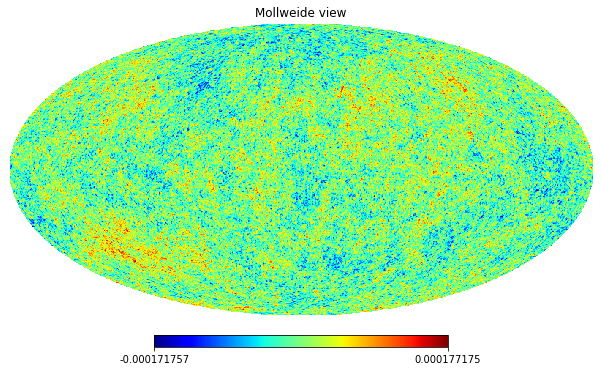

In [3]:
import healpy as hp
import ccgpack as ccg
import matplotlib.pyplot as plt

filename_l = '/content/drive/MyDrive/alms/alms15/alm_l_0015_v3.fits/alm_l_0015_v3.fits' 
filename_nl = '/content/drive/MyDrive/alms/alms15/alm_nl_0015_v3.fits/alm_nl_0015_v3.fits' 
alm_l  = hp.fitsfunc.read_alm(filename_l, hdu=1) 
alm_nl = hp.fitsfunc.read_alm(filename_nl, hdu=1) 

f_NL = 0 # Gaussian
alm = alm_l + f_NL * alm_nl 
map = hp.sphtfunc.alm2map(alm, nside=2048, lmax=1024, fwhm=0.0, verbose=True)
cmapp = plt.cm.get_cmap('jet') # cmap = color map
hp.mollview(map,cmap=cmapp)

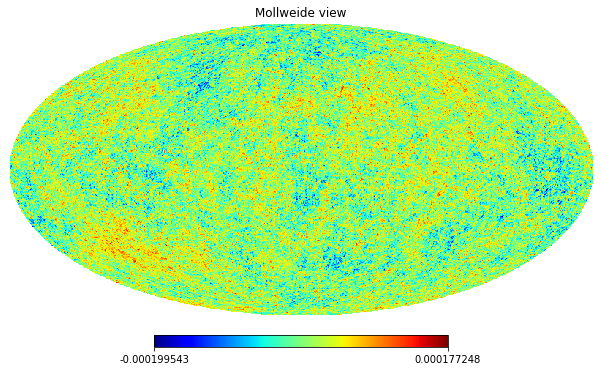

In [8]:
f_NL = 1000
alm = alm_l + f_NL * alm_nl 
map = hp.sphtfunc.alm2map(alm, nside=2048, lmax=1024, fwhm=0.0, verbose=True)
cmapp = plt.cm.get_cmap('jet') # cmap = color map
hp.mollview(map,cmap=cmapp)

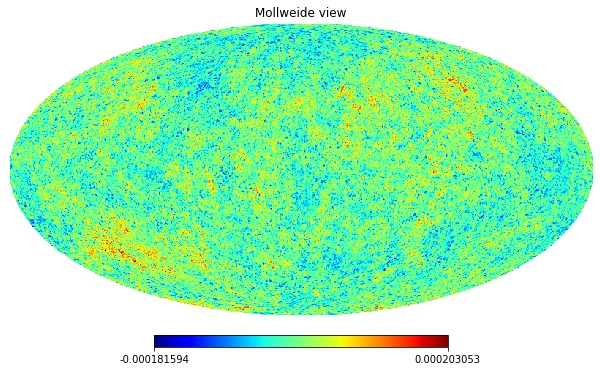

In [10]:
f_NL = -1000
alm = alm_l + f_NL * alm_nl 
map = hp.sphtfunc.alm2map(alm, nside=2048, lmax=1024, fwhm=0.0, verbose=True)
cmapp = plt.cm.get_cmap('jet') # cmap = color map
hp.mollview(map,cmap=cmapp)

The above representations are the full shape of each patch. This is while as I described in data_generation file, I split them into many mini-patches. This is one of the mini-bathches:

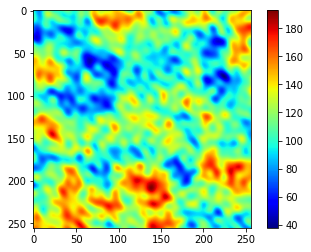

In [13]:
import numpy as np
map = hp.reorder(map,r2n=1)
map -= np.min(map) 
map /= (np.max(map)/255.)
patch = ccg.sky2patch(map,8)
plt.imshow(patch[0], cmap=cmapp)
plt.colorbar()
plt.show()